<a href="https://colab.research.google.com/github/shloak17107/airline-delay-prediction/blob/Data-Preprocessing/CMPE_257_Airline_Delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING THE DATASET FROM KAGGLE WEBSITE

In [1]:
!pip install kagglehub -q


import kagglehub
import pandas as pd
import os

print("Downloading dataset...")
dataset_path = kagglehub.dataset_download('sherrytp/airline-delay-analysis')
print(f"Dataset downloaded to: {dataset_path}")

Dataset downloaded to: /kaggle/input/airline-delay-analysis


In [2]:
gltaboada_usdpttransport_bts_carriers_path = kagglehub.dataset_download('gltaboada/usdpttransport-bts-carriers')
print(f"Dataset downloaded to: {gltaboada_usdpttransport_bts_carriers_path}")

Dataset downloaded to: /kaggle/input/usdpttransport-bts-carriers


In [3]:
!ls -lh "$gltaboada_usdpttransport_bts_carriers_path"

total 52K
-rw-r--r-- 1 1000 1000 50K Apr 30 07:59 L_UNIQUE_CARRIERS.csv


In [4]:
gltaboada_usdpttransport_bts_carriers_path = gltaboada_usdpttransport_bts_carriers_path + "/L_UNIQUE_CARRIERS.csv"

In [5]:
!ls -lh "$gltaboada_usdpttransport_bts_carriers_path"

-rw-r--r-- 1 1000 1000 50K Apr 30 07:59 /kaggle/input/usdpttransport-bts-carriers/L_UNIQUE_CARRIERS.csv


IMPORTING LIBRARIES

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

LOADING THE DATA INTO MEMORY + INFO

In [7]:
!ls -lh "$dataset_path"

total 0
drwxr-sr-x 2 1000 1000 0 Apr 30 00:56 'airline delay analysis'


In [8]:
!ls -lh "$dataset_path/airline delay analysis/"

total 8.2G
-rw-r--r-- 1 1000 1000 756M Apr 30 00:59 2009.csv
-rw-r--r-- 1 1000 1000 758M Apr 30 00:59 2010.csv
-rw-r--r-- 1 1000 1000 713M Apr 30 00:59 2011.csv
-rw-r--r-- 1 1000 1000 740M Apr 30 00:59 2012.csv
-rw-r--r-- 1 1000 1000 751M Apr 30 00:59 2013.csv
-rw-r--r-- 1 1000 1000 687M Apr 30 00:59 2014.csv
-rw-r--r-- 1 1000 1000 686M Apr 30 00:59 2015.csv
-rw-r--r-- 1 1000 1000 663M Apr 30 00:59 2016.csv
-rw-r--r-- 1 1000 1000 670M Apr 30 00:59 2017.csv
-rw-r--r-- 1 1000 1000 852M Apr 30 00:59 2018.csv
-rw-r--r-- 1 1000 1000 772M Apr 30 00:59 2019.csv
-rw-r--r-- 1 1000 1000 255M Apr 30 00:57 20.csv


In [9]:
data_directory = dataset_path + "/airline delay analysis/"


In [10]:
file = "2009.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2009 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2009.shape}")
df_2009.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/2009.csv
Shape (rows, columns): (6429338, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429338 entries, 0 to 6429337
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME

In [11]:
file = "2010.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2010 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2010.shape}")
df_2010.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/2010.csv
Shape (rows, columns): (6450117, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6450117 entries, 0 to 6450116
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME

In [12]:
file = "2011.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2011 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2011.shape}")
df_2011.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/2011.csv
Shape (rows, columns): (6066650, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6066650 entries, 0 to 6066649
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME

In [13]:
file = "2012.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2012 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2012.shape}")
df_2012.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/2012.csv
Shape (rows, columns): (6096762, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6096762 entries, 0 to 6096761
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         float64
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         float64
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME

In [14]:
file = "2013.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2013 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2013.shape}")
df_2013.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/2013.csv
Shape (rows, columns): (6369482, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6369482 entries, 0 to 6369481
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME

In [15]:
file = "2014.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2014 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2014.shape}")
df_2014.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/2014.csv
Shape (rows, columns): (5819811, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819811 entries, 0 to 5819810
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME

In [16]:
file = "2015.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2015 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2015.shape}")
df_2015.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/2015.csv
Shape (rows, columns): (5819079, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME

In [17]:
file = "2016.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2016 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2016.shape}")
df_2016.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/2016.csv
Shape (rows, columns): (5617658, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617658 entries, 0 to 5617657
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME

In [18]:
file = "2017.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2017 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2017.shape}")
df_2017.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/2017.csv
Shape (rows, columns): (5674621, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674621 entries, 0 to 5674620
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME

In [19]:
file = "2018.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2018 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2018.shape}")
df_2018.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/2018.csv
Shape (rows, columns): (7213446, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME

In [20]:
file = "2019.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2019 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2019.shape}")
df_2019.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/2019.csv
Shape (rows, columns): (7422037, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422037 entries, 0 to 7422036
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_UNIQUE_CARRIER    object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   DEP_TIME             float64
 6   DEP_DELAY            float64
 7   TAXI_OUT             float64
 8   WHEELS_OFF           float64
 9   WHEELS_ON            float64
 10  TAXI_IN              float64
 11  ARR_TIME             float64
 12  ARR_DELAY            float64
 13  AIR_TIME             float64
 14  DISTANCE             float64
 15  CARRIER_DELAY        float64
 16  WEATHER_DELAY        float64
 17  NAS_DELAY            float64
 18  SECURITY_DELAY       float64
 19  LATE_AIRCRAFT_DELAY  float64
 20  Unnamed:

In [21]:
file = "20.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")
df_2020 = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_2020.shape}")
df_2020.info()

Attempting to load: /kaggle/input/airline-delay-analysis/airline delay analysis/20.csv
Shape (rows, columns): (2547574, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547574 entries, 0 to 2547573
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         float64
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         float64
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    float64
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME  

PREPARE AND MERGE YEARLY DATA

In [22]:
# 1. Rename column in df_2019 for consistency
try:
    if 'OP_UNIQUE_CARRIER' in df_2019.columns:
        df_2019.rename(columns={'OP_UNIQUE_CARRIER': 'OP_CARRIER'}, inplace=True)
        print("Renamed 'OP_UNIQUE_CARRIER' to 'OP_CARRIER' in df_2019.")
    else:
        print("Column 'OP_UNIQUE_CARRIER' not found in df_2019 (already named OP_CARRIER or missing?).")
except NameError:
    print("Warning: df_2019 does not seem to be defined.")
except Exception as e:
    print(f"An error occurred renaming column in df_2019: {e}")

Renamed 'OP_UNIQUE_CARRIER' to 'OP_CARRIER' in df_2019.


In [23]:
merged_df = pd.concat([df_2009, df_2010, df_2011, df_2012, df_2013,
                       df_2014, df_2015, df_2016, df_2017, df_2018,
                       df_2019, df_2020],
                      ignore_index=True)

In [24]:
print(f"Shape (rows, columns): {merged_df.shape}")

Shape (rows, columns): (71526575, 29)


In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71526575 entries, 0 to 71526574
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         float64
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         float64
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 

In [26]:
columns_to_drop = ['Unnamed: 27', 'Unnamed: 20']
merged_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [27]:
print(f"Shape (rows, columns): {merged_df.shape}")
merged_df.head()

Shape (rows, columns): (71526575, 27)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2009-01-01,XE,1204,DCA,EWR,1100.0,1058.0,-2.0,18.0,1116.0,...,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510.0,1509.0,-1.0,28.0,1537.0,...,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100.0,1059.0,-1.0,20.0,1119.0,...,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240.0,1249.0,9.0,10.0,1259.0,...,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715.0,1705.0,-10.0,24.0,1729.0,...,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN


DATASET

In [28]:
# Converting the FL_DATE column to datetime, to extract the day, month, year and weekday
merged_df['FL_DATE'] = pd.to_datetime(merged_df['FL_DATE'], errors='coerce')

# Incase, unable to parse dates
parsing_errors = merged_df['FL_DATE'].isnull().sum()
if parsing_errors > 0:
    print(f"Warning: {parsing_errors} rows had FL_DATE values that could not be parsed.")
else:
    print("FL_DATE column successfully converted to datetime.")

# Adding 'DayOfWeek' (Monday=0, Sunday=6)
merged_df['DAY_OF_WEEK'] = merged_df['FL_DATE'].dt.dayofweek

# Adding 'Date' (which is the day of the month)
merged_df['DATE'] = merged_df['FL_DATE'].dt.day

# Adding 'Month' (1-12)
merged_df['MONTH'] = merged_df['FL_DATE'].dt.month

# Adding 'Year'
merged_df['YEAR'] = merged_df['FL_DATE'].dt.year

FL_DATE column successfully converted to datetime.


In [29]:
merged_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DAY_OF_WEEK,DATE,MONTH,YEAR
0,2009-01-01,XE,1204,DCA,EWR,1100.0,1058.0,-2.0,18.0,1116.0,...,199.0,NaN,NaN,NaN,NaN,NaN,3,1,1,2009
1,2009-01-01,XE,1206,EWR,IAD,1510.0,1509.0,-1.0,28.0,1537.0,...,213.0,NaN,NaN,NaN,NaN,NaN,3,1,1,2009
2,2009-01-01,XE,1207,EWR,DCA,1100.0,1059.0,-1.0,20.0,1119.0,...,199.0,NaN,NaN,NaN,NaN,NaN,3,1,1,2009
3,2009-01-01,XE,1208,DCA,EWR,1240.0,1249.0,9.0,10.0,1259.0,...,199.0,NaN,NaN,NaN,NaN,NaN,3,1,1,2009
4,2009-01-01,XE,1209,IAD,EWR,1715.0,1705.0,-10.0,24.0,1729.0,...,213.0,NaN,NaN,NaN,NaN,NaN,3,1,1,2009


In [30]:
carriers = pd.read_csv(gltaboada_usdpttransport_bts_carriers_path)
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [31]:
merged_df = pd.merge(merged_df, carriers, left_on='OP_CARRIER', right_on='Code', how='left')
merged_df.rename(columns={'Description': 'OP_CARRIER_NAME'}, inplace=True)
merged_df.drop('Code', axis=1, inplace=True)

merged_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DAY_OF_WEEK,DATE,MONTH,YEAR,OP_CARRIER_NAME
0,2009-01-01,XE,1204,DCA,EWR,1100.0,1058.0,-2.0,18.0,1116.0,...,NaN,NaN,NaN,NaN,NaN,3,1,1,2009,ExpressJet Airlines Inc.
1,2009-01-01,XE,1206,EWR,IAD,1510.0,1509.0,-1.0,28.0,1537.0,...,NaN,NaN,NaN,NaN,NaN,3,1,1,2009,ExpressJet Airlines Inc.
2,2009-01-01,XE,1207,EWR,DCA,1100.0,1059.0,-1.0,20.0,1119.0,...,NaN,NaN,NaN,NaN,NaN,3,1,1,2009,ExpressJet Airlines Inc.
3,2009-01-01,XE,1208,DCA,EWR,1240.0,1249.0,9.0,10.0,1259.0,...,NaN,NaN,NaN,NaN,NaN,3,1,1,2009,ExpressJet Airlines Inc.
4,2009-01-01,XE,1209,IAD,EWR,1715.0,1705.0,-10.0,24.0,1729.0,...,NaN,NaN,NaN,NaN,NaN,3,1,1,2009,ExpressJet Airlines Inc.


In [32]:
merged_df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DAY_OF_WEEK,DATE,MONTH,YEAR,OP_CARRIER_NAME
0,2009-01-01,XE,1204,DCA,EWR,1100.0,1058.0,-2.0,18.0,1116.0,...,NaN,NaN,NaN,NaN,NaN,3,1,1,2009,ExpressJet Airlines Inc.
1,2009-01-01,XE,1206,EWR,IAD,1510.0,1509.0,-1.0,28.0,1537.0,...,NaN,NaN,NaN,NaN,NaN,3,1,1,2009,ExpressJet Airlines Inc.
2,2009-01-01,XE,1207,EWR,DCA,1100.0,1059.0,-1.0,20.0,1119.0,...,NaN,NaN,NaN,NaN,NaN,3,1,1,2009,ExpressJet Airlines Inc.
3,2009-01-01,XE,1208,DCA,EWR,1240.0,1249.0,9.0,10.0,1259.0,...,NaN,NaN,NaN,NaN,NaN,3,1,1,2009,ExpressJet Airlines Inc.
4,2009-01-01,XE,1209,IAD,EWR,1715.0,1705.0,-10.0,24.0,1729.0,...,NaN,NaN,NaN,NaN,NaN,3,1,1,2009,ExpressJet Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71526570,2020-06-30,MQ,3312,CVG,DFW,1010.0,-5.0,10.0,1020.0,1132.0,...,NaN,NaN,NaN,NaN,NaN,1,30,6,2020,Envoy Air
71526571,2020-06-30,MQ,3313,DFW,CRP,1834.0,-1.0,16.0,1850.0,1945.0,...,NaN,NaN,NaN,NaN,NaN,1,30,6,2020,Envoy Air
71526572,2020-06-30,MQ,3314,DFW,LIT,1440.0,-5.0,12.0,1452.0,1542.0,...,NaN,NaN,NaN,NaN,NaN,1,30,6,2020,Envoy Air
71526573,2020-06-30,MQ,3315,FSM,DFW,651.0,-9.0,10.0,701.0,742.0,...,NaN,NaN,NaN,NaN,NaN,1,30,6,2020,Envoy Air


In [33]:
print(merged_df[merged_df['YEAR'] == 2019][['CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY']])

          CRS_ARR_TIME  ARR_TIME  ARR_DELAY  CRS_DEP_TIME  DEP_TIME  DEP_DELAY
61556964           NaN     722.0       -1.0           NaN     601.0        1.0
61556965           NaN    1633.0      -36.0           NaN    1359.0       -5.0
61556966           NaN    1329.0      -16.0           NaN    1215.0       -5.0
61556967           NaN    1625.0      -14.0           NaN    1521.0       -6.0
61556968           NaN    1940.0      -25.0           NaN    1847.0      -15.0
...                ...       ...        ...           ...       ...        ...
68978996           NaN    1731.0       52.0           NaN    1500.0       64.0
68978997           NaN    1533.0      -17.0           NaN    1414.0       -6.0
68978998           NaN     751.0      -34.0           NaN     652.0       -8.0
68978999           NaN    1248.0      -27.0           NaN     812.0       -1.0
68979000           NaN     722.0      -16.0           NaN     431.0        2.0

[7422037 rows x 6 columns]


In [47]:
print(merged_df[merged_df['YEAR'] == 2018][['CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY']])

          CRS_ARR_TIME  ARR_TIME  ARR_DELAY  CRS_DEP_TIME  DEP_TIME  DEP_DELAY
54343518        1745.0    1722.0      -23.0        1517.0    1512.0       -5.0
54343519        1254.0    1230.0      -24.0        1115.0    1107.0       -8.0
54343520        1649.0    1636.0      -13.0        1335.0    1330.0       -5.0
54343521        1756.0    1754.0       -2.0        1546.0    1552.0        6.0
54343522         922.0     936.0       14.0         630.0     650.0       20.0
...                ...       ...        ...           ...       ...        ...
61556959        1714.0    1709.0       -5.0        1534.0    1530.0       -4.0
61556960        1952.0    1953.0        1.0        1751.0    1757.0        6.0
61556961        2107.0    2118.0       11.0        2015.0    2010.0       -5.0
61556962        1350.0    1404.0       14.0        1300.0    1323.0       23.0
61556963        1546.0    1542.0       -4.0        1435.0    1443.0        8.0

[7213446 rows x 6 columns]


In [34]:
print("Summary Statistics for Object/Categorical Columns:")
merged_df.describe(include=['object', 'category'])

Summary Statistics for Object/Categorical Columns:


,OP_CARRIER,ORIGIN,DEST,CANCELLATION_CODE,OP_CARRIER_NAME
count,71526575,71526575,71526575,1225611,71526575
unique,23,389,387,628,23
top,WN,ATL,ATL,B,Southwest Airlines Co.
freq,13992063,4426393,4426552,476446,13992063


In [35]:
merged_df['ARR_DELAY'].describe()

,ARR_DELAY
count,7.025142e+07
mean,3.296281e+01
std,1.851379e+02
min,-4.110000e+02
25%,-1.300000e+01
50%,-4.000000e+00
75%,1.100000e+01
max,5.095000e+03


Target Variable Analysis (ARR_DELAY):


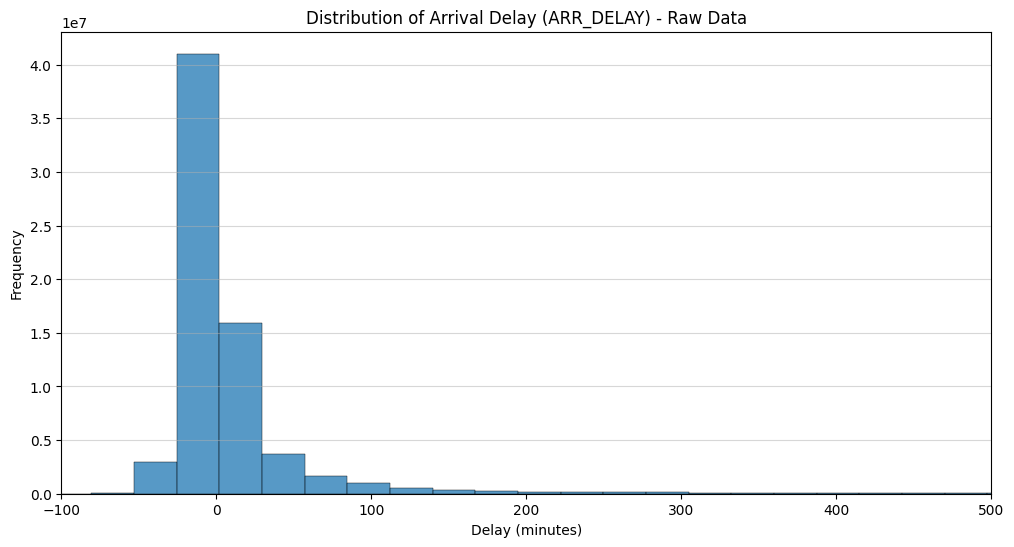

In [36]:
print("Target Variable Analysis (ARR_DELAY):")
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['ARR_DELAY'].dropna(), bins=200, kde=False) # Use more bins for detail
plt.title('Distribution of Arrival Delay (ARR_DELAY) - Raw Data')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(-100, 500) # Adjust x-limits to see the bulk of the distribution
plt.grid(axis='y', alpha=0.5)
plt.show()

In [37]:
print("Missing Values per Column (%):")
missing_percent = (merged_df.isnull().sum() / len(merged_df)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Missing Values per Column (%):
CANCELLATION_CODE      98.286496
CARRIER_DELAY          82.132525
LATE_AIRCRAFT_DELAY    82.132525
SECURITY_DELAY         82.132525
NAS_DELAY              82.132525
WEATHER_DELAY          82.132525
ACTUAL_ELAPSED_TIME    15.149562
CRS_ELAPSED_TIME       13.585537
CANCELLED              13.585453
DIVERTED               13.585453
CRS_ARR_TIME           10.752371
CRS_DEP_TIME           10.745619
AIR_TIME                5.340857
DISTANCE                3.561717
ARR_TIME                1.962103
WHEELS_ON               1.957242
TAXI_IN                 1.957240
WHEELS_OFF              1.905806
TAXI_OUT                1.904586
DEP_DELAY               1.866708
DEP_TIME                1.859168
ARR_DELAY               1.782772
dtype: float64


In [38]:
print("Exploring Key Categorical Features (Examples):")
key_cats = ['OP_CARRIER', 'ORIGIN', 'DEST', 'DAY_OF_WEEK', 'MONTH', 'CANCELLED', 'DIVERTED', 'CANCELLATION_CODE']
for col in key_cats:
    if col in merged_df.columns:
        print(f"\n--- Column: {col} ---")
        print(f"  Number of Unique Values: {merged_df[col].nunique()}")
        print("  Value Counts (Top 10 or All if Few):")
        print(merged_df[col].value_counts(dropna=False).head(10 if merged_df[col].nunique() > 10 else merged_df[col].nunique()))

Exploring Key Categorical Features (Examples):

--- Column: OP_CARRIER ---
  Number of Unique Values: 23
  Value Counts (Top 10 or All if Few):
OP_CARRIER
WN    13992063
DL     9140489
AA     7949265
OO     7403529
UA     5633292
EV     4904779
MQ     3655543
B6     2870288
US     2657286
AS     2004218
Name: count, dtype: int64

--- Column: ORIGIN ---
  Number of Unique Values: 389
  Value Counts (Top 10 or All if Few):
ORIGIN
ATL    4426393
ORD    3447140
DFW    2962508
DEN    2647242
LAX    2422581
PHX    1962154
IAH    1910100
SFO    1836232
LAS    1696349
CLT    1659798
Name: count, dtype: int64

--- Column: DEST ---
  Number of Unique Values: 387
  Value Counts (Top 10 or All if Few):
DEST
ATL    4426552
ORD    3447223
DFW    2962434
DEN    2647223
LAX    2422869
PHX    1962130
IAH    1910341
SFO    1836529
LAS    1696400
CLT    1659779
Name: count, dtype: int64

--- Column: DAY_OF_WEEK ---
  Number of Unique Values: 7
  Value Counts (Top 10 or All if Few):
DAY_OF_WEEK
0    10655

Correlation Matrix (Numerical Columns):

Correlations with ARR_DELAY:
ARR_DELAY              1.000000
TAXI_IN                0.741745
TAXI_OUT               0.729151
CARRIER_DELAY          0.618020
LATE_AIRCRAFT_DELAY    0.501817
DIVERTED               0.282988
WEATHER_DELAY          0.278026
NAS_DELAY              0.276251
YEAR                   0.258440
DEP_DELAY              0.239968
CANCELLED              0.215937
WHEELS_OFF             0.068596
CRS_DEP_TIME           0.018633
SECURITY_DELAY         0.017452
DAY_OF_WEEK            0.002498
AIR_TIME               0.000176
DATE                  -0.003852
DISTANCE              -0.020129
ACTUAL_ELAPSED_TIME   -0.049981
CRS_ELAPSED_TIME      -0.095683
MONTH                 -0.163688
DEP_TIME              -0.313456
ARR_TIME              -0.313706
WHEELS_ON             -0.346091
CRS_ARR_TIME          -0.375352
Name: ARR_DELAY, dtype: float64


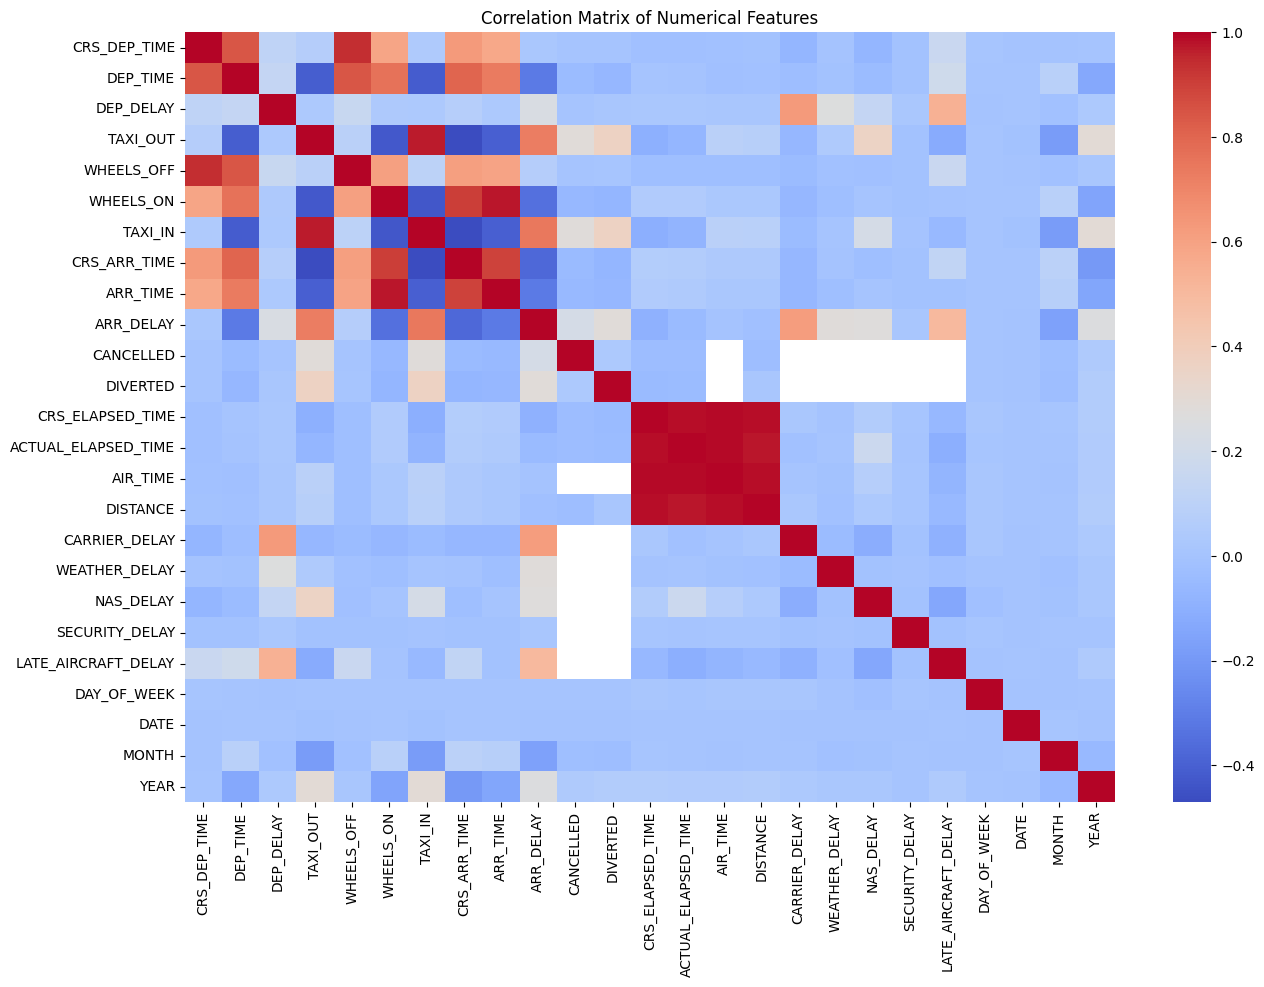

In [39]:
print("Correlation Matrix (Numerical Columns):")
# Select only numerical columns for correlation calculation
numeric_df = merged_df.select_dtypes(include=np.number)
# Drop columns that are mostly identifiers or sparse indicators if necessary before correlation
cols_to_drop_for_corr = [col for col in ['Unnamed: 27', 'OP_CARRIER_FL_NUM'] if col in numeric_df.columns] # Example
if cols_to_drop_for_corr:
      numeric_df = numeric_df.drop(columns=cols_to_drop_for_corr)

correlation_matrix = numeric_df.corr()

print("\nCorrelations with ARR_DELAY:")
print(correlation_matrix['ARR_DELAY'].sort_values(ascending=False))

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # annot=True is too crowded
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Visualizing Relationships (Examples):


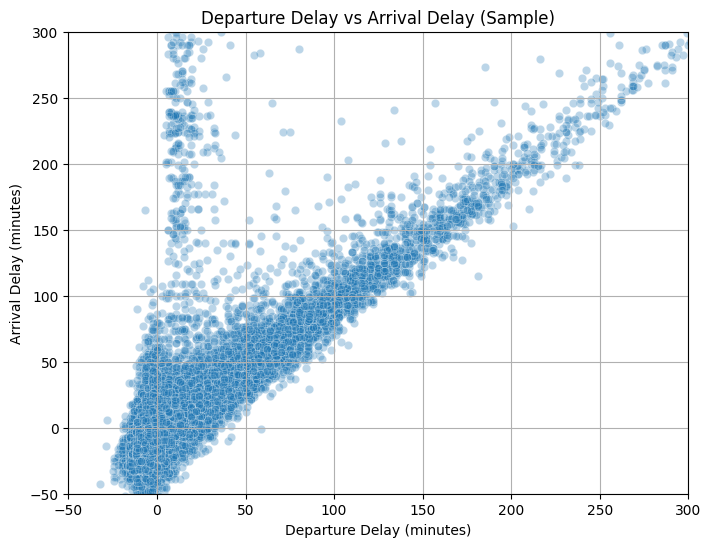

In [40]:
print("Visualizing Relationships (Examples):")
# Scatter plot: Departure Delay vs Arrival Delay
plt.figure(figsize=(8, 6))
# Sample data to avoid overplotting if the dataset is huge
sample_df = merged_df.sample(n=min(50000, len(merged_df)), random_state=42) # Sample 50k points or less
sns.scatterplot(data=sample_df, x='DEP_DELAY', y='ARR_DELAY', alpha=0.3)
plt.title('Departure Delay vs Arrival Delay (Sample)')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.xlim(-50, 300) # Zoom in on common range
plt.ylim(-50, 300)
plt.grid(True)
plt.show()

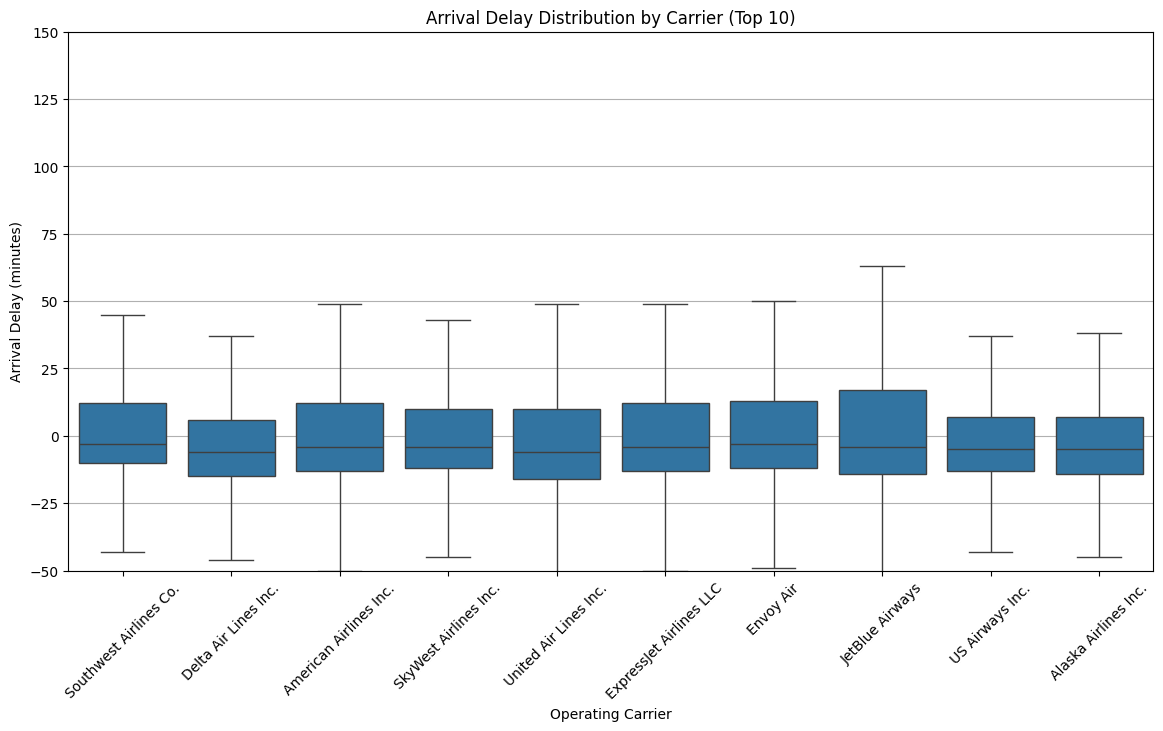

In [41]:
# Box plot: Arrival Delay by Carrier (Top N Carriers)
if 'OP_CARRIER' in merged_df.columns:
    top_carriers = merged_df['OP_CARRIER_NAME'].value_counts().nlargest(10).index.tolist()
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=merged_df[merged_df['OP_CARRIER_NAME'].isin(top_carriers)], x='OP_CARRIER_NAME', y='ARR_DELAY', order=top_carriers, showfliers=False)
    plt.title('Arrival Delay Distribution by Carrier (Top 10)')
    plt.xlabel('Operating Carrier')
    plt.ylabel('Arrival Delay (minutes)')
    plt.ylim(-50, 150)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

In [42]:
unique_airlines_list = merged_df['OP_CARRIER_NAME'].unique()
print(f"Total number of unique airlines analyzed: {len(unique_airlines_list)}")
print(unique_airlines_list)

Total number of unique airlines analyzed: 23
['ExpressJet Airlines Inc.' 'Mesa Airlines Inc.' 'Northwest Airlines Inc.'
 'PSA Airlines Inc.' 'SkyWest Airlines Inc.' 'United Air Lines Inc.'
 'US Airways Inc.' 'Southwest Airlines Co.' 'ExpressJet Airlines LLC'
 'Frontier Airlines Inc.' 'AirTran Airways Corporation'
 'Hawaiian Airlines Inc.' 'Envoy Air' 'Endeavor Air Inc.'
 'American Airlines Inc.' 'Alaska Airlines Inc.' 'JetBlue Airways'
 'Continental Air Lines Inc.' 'Delta Air Lines Inc.' 'Virgin America'
 'Spirit Air Lines' 'Allegiant Air' 'Republic Airline']


In [43]:
required_cols = ['OP_CARRIER_NAME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED']
if not all(col in merged_df.columns for col in required_cols):
    print(f"Error: One or more required columns missing from merged_df: {required_cols}")
else:
    print("Calculating average ARR_DELAY per airline (excluding cancelled/diverted flights)...")

    # --- Perform Filtering, Grouping, and Aggregation ---
    avg_arrival_delay_per_carrier = merged_df[
        (merged_df['CANCELLED'].fillna(0) != 1) &
        (merged_df['DIVERTED'].fillna(0) != 1)
    ].groupby('OP_CARRIER_NAME')['ARR_DELAY'].mean()


    # --- Display the result ---
    print("\nAverage Arrival Delay per Airline (minutes):")
    # Display the resulting Series (pandas might truncate if very long)
    with pd.option_context('display.max_rows', None): # Temporarily show all rows
        print(avg_arrival_delay_per_carrier)


Calculating average ARR_DELAY per airline (excluding cancelled/diverted flights)...

Average Arrival Delay per Airline (minutes):
OP_CARRIER_NAME
AirTran Airways Corporation      3.654327
Alaska Airlines Inc.            50.830710
Allegiant Air                  191.847484
American Airlines Inc.          45.241352
Continental Air Lines Inc.       5.135927
Delta Air Lines Inc.            31.298073
Endeavor Air Inc.               31.557698
Envoy Air                       21.575824
ExpressJet Airlines Inc.         7.513714
ExpressJet Airlines LLC         12.937980
Frontier Airlines Inc.          52.592024
Hawaiian Airlines Inc.          21.834928
JetBlue Airways                 43.846027
Mesa Airlines Inc.              38.541540
Northwest Airlines Inc.          3.924208
PSA Airlines Inc.               54.584233
Republic Airline                92.981654
SkyWest Airlines Inc.           25.875241
Southwest Airlines Co.          32.935167
Spirit Air Lines                84.396509
US Airways Inc

In [44]:
merged_df[merged_df['OP_CARRIER_NAME'] == 'Allegiant Air'][['ARR_DELAY', 'OP_CARRIER']]

,ARR_DELAY,OP_CARRIER
54347803,15.0,G4
54347804,5.0,G4
54347805,30.0,G4
54347806,37.0,G4
54347807,68.0,G4
...,...,...
71516015,394.0,G4
71516016,779.0,G4
71516017,589.0,G4
71516018,1553.0,G4


In [45]:
airline_name_to_find = 'Allegiant Air'
airline_name_column = 'OP_CARRIER_NAME'
delay_column = 'ARR_DELAY'
delay_threshold = 50

mask = (
    (merged_df[airline_name_column] == airline_name_to_find) &
    (merged_df[delay_column] > delay_threshold)
)
count_delayed_flights = mask.sum()

print(f"Number of flights for '{airline_name_to_find}' with '{delay_column}' > {delay_threshold} minutes: {count_delayed_flights}")

Number of flights for 'Allegiant Air' with 'ARR_DELAY' > 50 minutes: 70470


<ipython-input-46-504439fd98d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_arrival_delay_per_carrier.index, x=avg_arrival_delay_per_carrier.values, palette='viridis', orient='h')


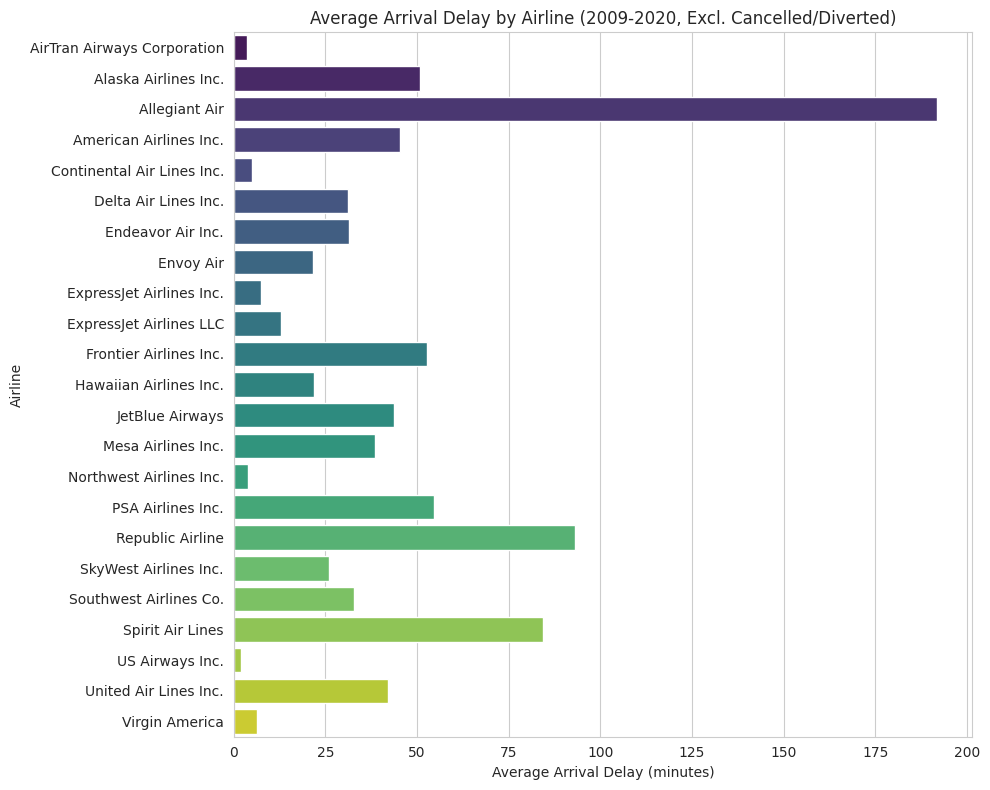

In [46]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(y=avg_arrival_delay_per_carrier.index, x=avg_arrival_delay_per_carrier.values, palette='viridis', orient='h')

plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Airline")
plt.title("Average Arrival Delay by Airline (2009-2020, Excl. Cancelled/Diverted)")

plt.tight_layout()
plt.show()

DATA CLEANING

In [55]:
# Keep only flights that were not cancelled or diverted and have a valid ARR_DELAY
merged_df = merged_df[
    (merged_df['CANCELLED'].fillna(0) == 0) &
    (merged_df['DIVERTED'].fillna(0) == 0) &
    (merged_df['ARR_DELAY'].notnull())
]

In [56]:
print("Missing Values per Column (%):")
missing_percent = (merged_df.isnull().sum() / len(merged_df)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Missing Values per Column (%):
LATE_AIRCRAFT_DELAY    81.752937
SECURITY_DELAY         81.752937
NAS_DELAY              81.752937
WEATHER_DELAY          81.752937
CARRIER_DELAY          81.752937
CRS_ELAPSED_TIME       13.654473
ACTUAL_ELAPSED_TIME    13.654473
CANCELLED              13.654470
DIVERTED               13.654470
CRS_ARR_TIME           10.761201
CRS_DEP_TIME           10.754305
AIR_TIME                3.333570
DISTANCE                3.333569
DEP_DELAY               0.384067
ARR_TIME                0.383738
WHEELS_ON               0.378771
WHEELS_OFF              0.378770
TAXI_IN                 0.378770
TAXI_OUT                0.377516
DEP_TIME                0.376921
dtype: float64


In [57]:
merged_df.drop('CANCELLATION_CODE', axis=1, inplace=True, errors='ignore')
print(f"Shape (rows, columns) after dropping 'CANCELLATION_CODE': {merged_df.shape}")


Shape (rows, columns) after dropping 'CANCELLATION_CODE': (70038631, 31)


<ipython-input-57-cf6d663fc9e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop('CANCELLATION_CODE', axis=1, inplace=True, errors='ignore')


In [58]:
# Define delay reason columns
delay_reason_cols = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

# Define the condition
invalid_delay_condition = (merged_df['ARR_DELAY'] > 15) & (merged_df[delay_reason_cols].isnull().all(axis=1))
# Count how many such rows
invalid_delay_count = invalid_delay_condition.sum()
print(f"Number of delayed flights (ARR_DELAY > 15) with all delay reasons missing: {invalid_delay_count}")

Number of delayed flights (ARR_DELAY > 15) with all delay reasons missing: 2334787


In [59]:
# Drop rows where ARR_DELAY > 15 but all delay reasons are still NaN
condition = (merged_df['ARR_DELAY'] > 15) & (merged_df[delay_reason_cols].isnull().all(axis=1))
merged_df = merged_df[~condition]

In [63]:
# Fill missing values in CANCELLED and DIVERTED with 0.0
# These are safe to assume as "not cancelled/diverted" since we've already filtered flights with valid ARR_DELAY
merged_df['CANCELLED'] = merged_df['CANCELLED'].fillna(0.0)
merged_df['DIVERTED'] = merged_df['DIVERTED'].fillna(0.0)

In [64]:
print("Missing Values per Column (%):")
missing_percent = (merged_df.isnull().sum() / len(merged_df)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Missing Values per Column (%):
LATE_AIRCRAFT_DELAY    81.123682
WEATHER_DELAY          81.123682
NAS_DELAY              81.123682
SECURITY_DELAY         81.123682
CARRIER_DELAY          81.123682
CRS_ARR_TIME           10.735334
CRS_ELAPSED_TIME       10.735334
ACTUAL_ELAPSED_TIME    10.735334
CRS_DEP_TIME           10.735333
DEP_DELAY               0.006777
WHEELS_ON               0.000001
ARR_TIME                0.000001
AIR_TIME                0.000001
dtype: float64


In [65]:
# Drop rows where DEP_DELAY, WHEELS_ON, ARR_TIME, or AIR_TIME are missing
# These columns have less than 0.01% missing values, so dropping them has negligible impact
# This helps keep the dataset clean without introducing noise through imputation
cols_to_drop_na = ['DEP_DELAY', 'WHEELS_ON', 'ARR_TIME', 'AIR_TIME']
merged_df.dropna(subset=cols_to_drop_na, inplace=True)

In [66]:
# Define time-related columns
time_cols = ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME']

# Drop rows where all 4 time-related columns are missing
# These records are likely incomplete/corrupted and not usable for modeling
merged_df = merged_df[~merged_df[time_cols].isnull().all(axis=1)]

# Drop 'ACTUAL_ELAPSED_TIME' to prevent data leakage during model training
# This field reflects actual flight outcome and is not known beforehand
merged_df.drop(columns=['ACTUAL_ELAPSED_TIME'], inplace=True)

# (Optional) Verify how much missing data remains in the time columns
print("Remaining missing values:")
print(merged_df[['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME']].isnull().sum())


Remaining missing values:
CRS_DEP_TIME        1
CRS_ARR_TIME        2
CRS_ELAPSED_TIME    2
dtype: int64


In [ ]:
# Drop final few rows with missing scheduled time fields (only 1–2 rows per column)
# These records are insignificant in volume and not useful for feature extraction
merged_df.dropna(subset=['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME'], inplace=True)